In [26]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

df = pd.read_csv('soc16.csv')
df.head()

,ACS,AGER,ASSOC,BASE,CAT,CLOS,CON,DECK,DET,DIV,...,FFNSQ_F,SLPR_F,FSLPR_F,CONPR_F,FCONPR_F,LOTV_F,SQFS_F,FSQFS_F,PVALU_F,AUTH
0,2,2,1,1,1,0,2,1,2,1,...,0,0,0,0,0,0,0,0,0,201510
1,1,2,1,1,1,0,1,1,2,1,...,0,0,0,0,0,0,0,0,0,201605
2,1,2,2,1,1,0,2,1,1,1,...,0,0,0,0,0,0,0,0,0,201506
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,201609
4,1,2,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,201511


In [27]:
material_count = df.groupby('WAL1').agg(['count'])
material_count

,ACS,AGER,ASSOC,BASE,CAT,CLOS,CON,DECK,DET,DIV,...,FFNSQ_F,SLPR_F,FSLPR_F,CONPR_F,FCONPR_F,LOTV_F,SQFS_F,FSQFS_F,PVALU_F,AUTH
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
WAL1,,,,,,,,,,,,,,,,,,,,,
0,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,...,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012
1,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,...,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266
2,4745,4745,4745,4745,4745,4745,4745,4745,4745,4745,...,4745,4745,4745,4745,4745,4745,4745,4745,4745,4745
4,4691,4691,4691,4691,4691,4691,4691,4691,4691,4691,...,4691,4691,4691,4691,4691,4691,4691,4691,4691,4691
5,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,...,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246
6,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
7,368,368,368,368,368,368,368,368,368,368,...,368,368,368,368,368,368,368,368,368,368
8,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,...,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171


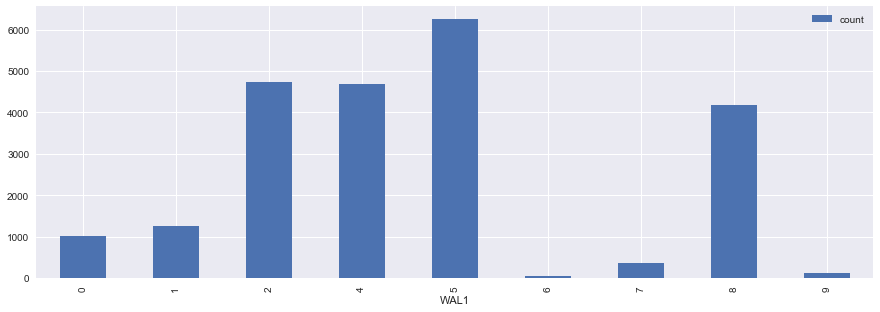

In [28]:
%matplotlib inline
material_count['ACS'].plot(kind = 'bar', figsize = (15, 5))

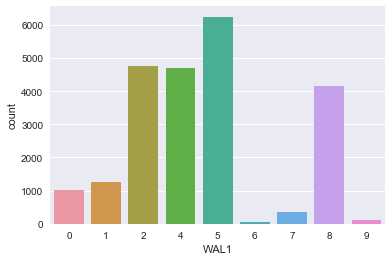

In [30]:
bedroom_count = df['WAL1'].value_counts()
sns.countplot(df['WAL1'])

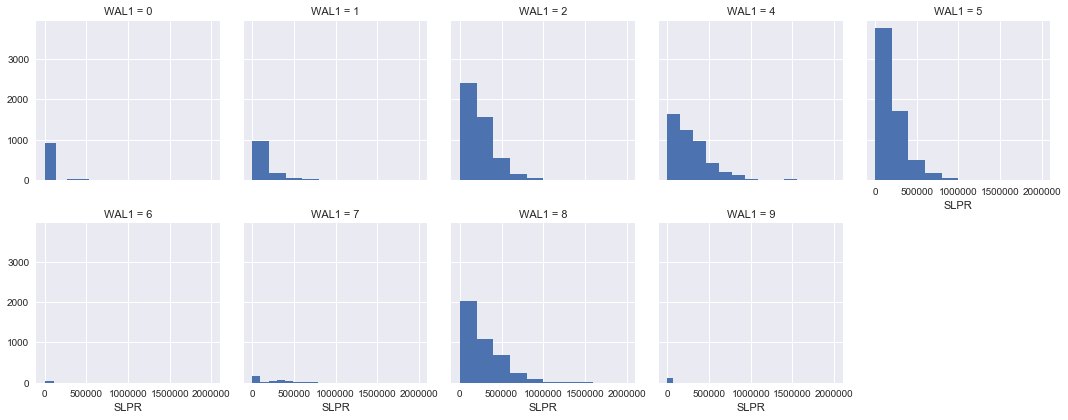

In [39]:
multiples = sns.FacetGrid(df, col = 'WAL1', col_wrap = 5)
multiples = multiples.map(plt.hist, 'SLPR')

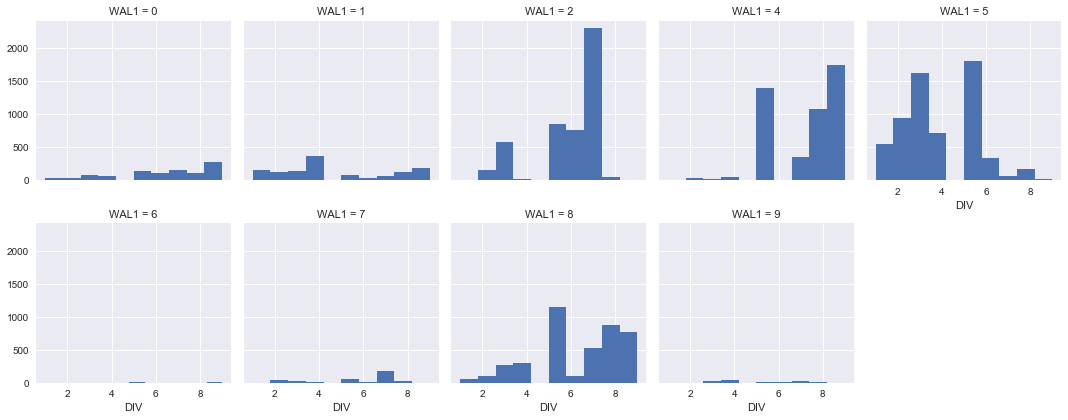

In [40]:
multiples = sns.FacetGrid(df, col = 'WAL1', col_wrap = 5)
multiples = multiples.map(plt.hist, 'DIV')

In [31]:
dummy_ranks = pd.get_dummies(df['WAL1'], prefix = 'Wall_Material')
dummy_ranks.head()

,Wall_Material_0,Wall_Material_1,Wall_Material_2,Wall_Material_4,Wall_Material_5,Wall_Material_6,Wall_Material_7,Wall_Material_8,Wall_Material_9
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [32]:
df['WAL1'].head()

0    5
1    5
2    5
3    5
4    5
Name: WAL1, dtype: int64

In [34]:
cols_to_keep = ['SLPR']
data = df[cols_to_keep].join(dummy_ranks)
data.head()

,SLPR,Wall_Material_0,Wall_Material_1,Wall_Material_2,Wall_Material_4,Wall_Material_5,Wall_Material_6,Wall_Material_7,Wall_Material_8,Wall_Material_9
0,366500,0,0,0,0,1,0,0,0,0
1,549000,0,0,0,0,1,0,0,0,0
2,349900,0,0,0,0,1,0,0,0,0
3,316000,0,0,0,0,1,0,0,0,0
4,850000,0,0,0,0,1,0,0,0,0
